<a href="https://colab.research.google.com/github/cnsahithi-bit/FMML_Project_and_labs/blob/main/Module_1_Lab_2_Machine_Learning_terms_and_metrics_by_Om.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning terms and metrics

Module 1, Lab 2

In this lab, we will show a part of the ML pipeline by using the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. We will use the scikit-learn library to load the data and perform some basic data preprocessing and model training. We will also show how to evaluate the model using some common metrics, split the data into training and testing sets, and use cross-validation to get a better estimate of the model's performance.

## Common Machine Learning Evaluation Metrics

### Classification Metrics

**1. Accuracy**
$$\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}$$

**2. Precision** (How many predicted positives are actually positive?)
$$\text{Precision} = \frac{TP}{TP + FP}$$

**3. Recall/Sensitivity** (How many actual positives did we find?)
$$\text{Recall} = \frac{TP}{TP + FN}$$

**4. F1-Score** (Harmonic mean of Precision and Recall)
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

Where: **TP** = True Positives, **TN** = True Negatives, **FP** = False Positives, **FN** = False Negatives

### Regression Metrics

**1. Mean Absolute Error (MAE)**
$$\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

**2. Mean Squared Error (MSE)**
$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

**3. Root Mean Squared Error (RMSE)**
$$\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

---

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)

In [ ]:
dataset = datasets.fetch_california_housing()
# Dataset description
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Given below are the list of target values. These correspond to the house value derived considering all the 8 input features and are continuous values. We should use regression models to predict these values but we will start with a simple classification model for the sake of simplicity. We need to just round off the values to the nearest integer and use a classification model to predict the house value.

In [ ]:
print("Orignal target values:", dataset.target)

dataset.target = dataset.target.astype(int)

print("Target values after conversion:", dataset.target)
print("Input variables shape:", dataset.data.shape) #features
print("Output variables shape:", dataset.target.shape) #target 20640 rows and 0 columns i.e list of 20640 nums

Orignal target values: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
Target values after conversion: [4 3 3 ... 0 0 0]
Input variables shape: (20640, 8)
Output variables shape: (20640,)


The simplest model to use for classification is the K-Nearest Neighbors model. We will use this model to predict the house value with a K value of 1. We will also use the accuracy metric to evaluate the model.

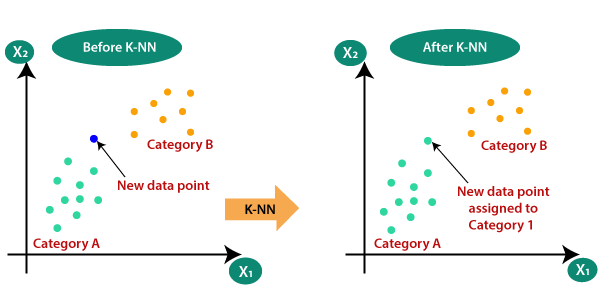

In [ ]:
def NN1(traindata, trainlabel, query):
    """
    This function takes in the training data, training labels and a query point
    and returns the predicted label for the query point using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    query: numpy array of shape (d,) where d is the number of features

    returns: the predicted label for the query point which is the label of the training data which is closest to the query point
    """
    diff = (
        traindata - query
    )  # find the difference between features. Numpy automatically takes care of the size here.“difference of every training sample from the query.”
    sq = diff * diff  # square the differences
    dist = sq.sum(1)  # add up the squares sum(1) → adds values horizontally (row-wise)
    label = trainlabel[np.argmin(dist)] #gives the first smallest distance
    return label


def NN(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the nearest neighbour algorithm

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is the label of the training data which is closest to each test point
    """
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel

These two functions together perform a nearest neighbor classification. The first function NN1() takes one query point and compares it with all training samples. It subtracts the query’s features from each training sample, squares the differences, and adds them up to find the total distance for each sample. The sample with the smallest distance is considered the “nearest,” and its label is returned as the predicted label. The second function NN() uses NN1() for every test sample — it loops through each test point, finds its nearest neighbor in the training data, and collects all those predicted labels into an array. In short, this code predicts the label of each test point by copying the label of the closest training point.

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
    """
    This function takes in the training data, training labels and test data
    and returns the predicted labels for the test data using the random classifier algorithm

    In reality, we don't need these arguments but we are passing them to keep the function signature consistent with other classifiers

    traindata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    trainlabel: numpy array of shape (n,) where n is the number of samples
    testdata: numpy array of shape (m,d) where m is the number of test samples and d is the number of features

    returns: the predicted labels for the test data which is a random label from the training data
    """

    classes = np.unique(trainlabel) #looks into all unique train labels
    rints = rng.integers(low=0, high=len(classes), size=len(testdata)) #generates random labels for the testdata from 0 to len(classes) high-1 is taken into consideration
    predlabel = classes[rints]#converts integer labels into there coressponding text
    return predlabel

**EXPLN**
Why use this?

It’s not smart, but it’s a baseline:

If your real AI/ML model is worse than this, something is wrong.

It helps you understand and compare better classifiers.

We need a metric to evaluate the performance of the model. Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. We will use the accuracy metric to evaluate and compate the performance of the K-Nearest Neighbors model and the random classifier.

In [ ]:
def Accuracy(gtlabel, predlabel):
    """
    This function takes in the ground-truth labels and predicted labels
    and returns the accuracy of the classifier

    gtlabel: numpy array of shape (n,) where n is the number of samples
    predlabel: numpy array of shape (n,) where n is the number of samples

    returns: the accuracy of the classifier which is the number of correct predictions divided by the total number of predictions
    """
    assert len(gtlabel) == len( #assert checks for a condn n if it is false it stops n gives an error
        predlabel
    ), "Length of the ground-truth labels and predicted labels should be the same"
    correct = (
        gtlabel == predlabel
    ).sum()  # count the number of times the groundtruth label is equal to the predicted label.
    return correct / len(gtlabel)

import numpy as np

gtlabel = np.array([0,1,1,0])
predlabel = np.array([0,0,1,0])

correct = (gtlabel == predlabel).sum()  # 3
accuracy = correct / len(gtlabel)       # 3 / 4 = 0.75
print(accuracy)                         # 0.75


Let us make a function to split the dataset with the desired probability. We will use this function to split the dataset into training and testing sets. We will use the training set to train the model and the testing set to evaluate the model.

In [ ]:
def split(data, label, percent):
    # generate a random number for each sample
    rnd = rng.random(len(label)) #generates random nums from 0 to 1
    split1 = rnd < percent #array is created
    split2 = rnd >= percent #array is created

    split1data = data[split1, :] #all data where split1 rows are true n column
    split1label = label[split1]#all labels where split1 is true
    split2data = data[split2, :]
    split2label = label[split2]
    return split1data, split1label, split2data, split2label

**EXPLN**
Random numbers: [0.2 0.8 0.5 0.1 0.9]
Split1 (train) True/False: [ True False  True  True False]
Split2 (test) True/False: [False  True False False  True]

Train data:
 [[ 1 10]
  [ 3 30]
  [ 4 40]]
Train labels: [0 0 1]

Test data:
 [[ 2 20]
  [ 5 50]]
Test labels: [1 0]




We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(
    dataset.data, dataset.target, 20 / 100
)
print("Number of test samples:", len(testlabel))
print("Number of train samples:", len(alltrainlabel))
print("Percent of test data:", len(testlabel) * 100 / len(dataset.target), "%")

Number of test samples: 4144
Number of train samples: 16496
Percent of test data: 20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def print_classification_metrics(true_labels, pred_labels):
    """
    Calculate and print classification metrics
    """
    # For multi-class, we'll use macro averaging
    precision = precision_score(true_labels, pred_labels, average='macro', zero_division=0)
    recall = recall_score(true_labels, pred_labels, average='macro', zero_division=0)
    f1 = f1_score(true_labels, pred_labels, average='macro', zero_division=0)
    accuracy = np.mean(true_labels == pred_labels)  #average='macro' → works for multi-class classification, gives equal weight to each class,
    #zero_division=0 → prevents errors if a class has no predicted samples


    print(f"Accuracy:  {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"Recall:    {recall*100:.2f}%")
    print(f"F1-Score:  {f1*100:.2f}%")

    return accuracy, precision, recall, f1

def print_regression_metrics(true_values, pred_values):
    """
    Calculate and print regression metrics
    """
    mae = mean_absolute_error(true_values, pred_values)
    mse = mean_squared_error(true_values, pred_values)
    rmse = np.sqrt(mse)

    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return mae, mse, rmse

# Example: Evaluate validation set with multiple metrics
print("=== Validation Set Classification Metrics ===")
valpred = NN(traindata, trainlabel, valdata)
print_classification_metrics(vallabel, valpred)

=== Validation Set Classification Metrics ===
Accuracy:  34.11%
Precision: 26.19%
Recall:    24.41%
F1-Score:  25.01%


(np.float64(0.34108527131782945),
 0.2618519014073886,
 0.2440802242008584,
 0.2501492638552703)

=== Confusion Matrix for Validation Set ===


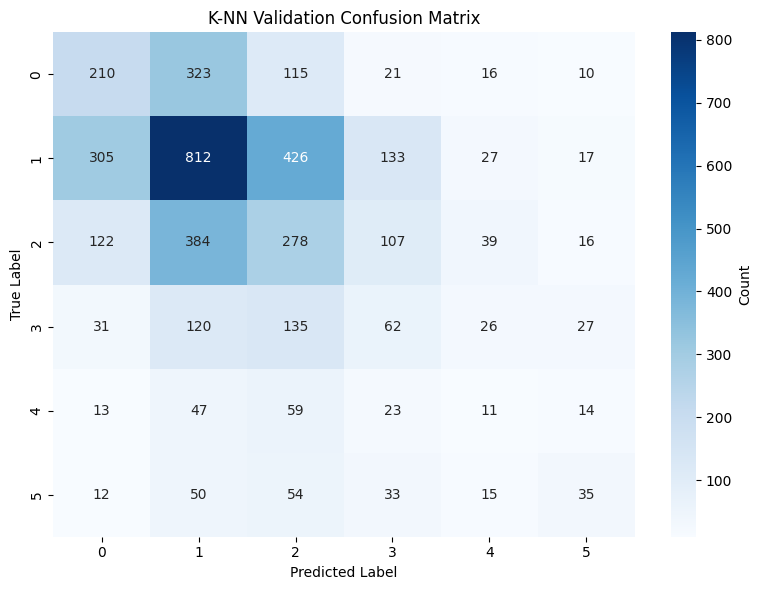

Confusion Matrix Shape: (6, 6)
Total Predictions: 4128


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(true_labels, pred_labels, title="Confusion Matrix"):
    """
    Plot confusion matrix heatmap
    """
    cm = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                cbar_kws={'label': 'Count'})
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    print(f"Confusion Matrix Shape: {cm.shape}")
    print(f"Total Predictions: {cm.sum()}")

# Visualize confusion matrix for validation predictions
print("=== Confusion Matrix for Validation Set ===")
valpred = NN(traindata, trainlabel, valdata)
plot_confusion_matrix(vallabel, valpred,
                     title="K-NN Validation Confusion Matrix")

**EXPLN** confusion matrix is a table that shows how well a classification model is performing by comparing the true labels of samples with the labels predicted by the model. Each row represents the actual (true) class, and each column represents the predicted class. The numbers along the diagonal indicate correct predictions, while the off-diagonal numbers show misclassifications (which true class was predicted as which wrong class). Visualizing it as a heatmap makes it easy to spot patterns: darker or higher numbers along the diagonal mean the model is performing well, and bright off-diagonal cells indicate which classes are being confused. This helps you quickly see both the overall accuracy and which specific classes the model struggles with.

true_labels = np.array([0, 1, 2, 1, 0])   # actual labels
pred_labels = np.array([0, 2, 2, 1, 0])   # model predicted labels
| True \ Pred | 0 | 1 | 2 |                                                  |
| ----------- | - | - | - | ------------------------------------------------ |
| **0**       | 2 | 0 | 0 | ← Two times class 0 was correctly predicted as 0 |
| **1**       | 0 | 1 | 1 | ← One time 1→1 correct, one time 1→2 wrong       |
| **2**       | 0 | 0 | 1 | ← One time 2→2 correct                           |


What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using nearest neighbour algorithm:", trainAccuracy*100, "%")

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Training accuracy using random classifier: ", trainAccuracy*100, "%")

Training accuracy using nearest neighbour algorithm: 100.0 %
Training accuracy using random classifier:  16.4375808538163 %


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case. This is because the random classifier randomly assigns a label to each sample and the probability of assigning the correct label is 1/(number of classes). Let us predict the labels for our validation set and get the accuracy. This accuracy is a good estimate of the accuracy of our model on unseen data.

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")


valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.10852713178294 %
Validation accuracy using random classifier: 16.884689922480618 %


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. Now let us try another random split and check the validation accuracy. We will see that the validation accuracy changes with the split. This is because the validation set is small and the accuracy is highly dependent on the samples in the validation set. We can get a better estimate of the accuracy by using cross-validation.

In [ ]:
traindata, trainlabel, valdata, vallabel = split(
    alltraindata, alltrainlabel, 75 / 100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour algorithm:", valAccuracy*100, "%")

Validation accuracy using nearest neighbour algorithm: 34.048257372654156 %


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)

print("Test accuracy:", testAccuracy*100, "%")

Test accuracy: 34.91795366795367 %


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

**ANSWERS**
1. Effect of validation set size on accuracy:

k-NN: If I increase the validation set, the validation accuracy becomes more reliable, but since training data is reduced, the model might perform slightly worse because k-NN relies on all training points to make predictions. Reducing the validation set gives more training data, so k-NN can perform better, but the validation accuracy becomes less reliable.

Random Classifier: Increasing or decreasing the validation set doesn’t affect learning (since it predicts randomly), but a larger validation set gives a more stable estimate of expected random accuracy, and a smaller one gives a noisier estimate.

2. Effect of training and validation size on predicting test accuracy:

k-NN: More training data improves the model’s predictions. A well-sized validation set (10–20%) helps tune hyperparameters, like the value of k, and the best hyperparameters on the validation set usually give good test accuracy.

Random Classifier: Training size doesn’t matter because it predicts randomly, but a proper validation set size ensures a reliable estimate of its expected accuracy on unseen test data.

3. Choosing a good split for balance:
For both classifiers, a good split is usually:
70% training, 10–20% validation, 10% testing.

k-NN: ensures enough data to learn, reliable validation for hyperparameter tuning, and fair test evaluation.

Random Classifier: ensures the validation and test accuracy estimates are stable, even though learning isn’t affected.


Skipping split with validation 0.1% because training or validation set too small.
Skipping split with validation 99.0% because training or validation set too small.


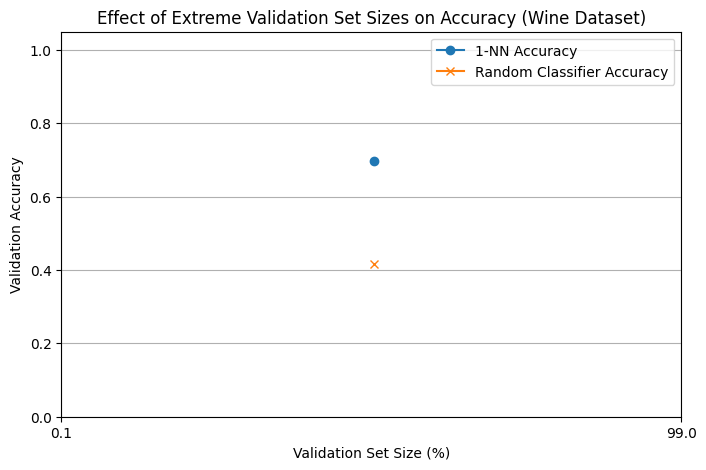

Validation size: 0.1% -> 1-NN Acc: nan%, Random Acc: nan%
Validation size: 50.0% -> 1-NN Acc: 69.66%, Random Acc: 41.57%
Validation size: 99.0% -> 1-NN Acc: nan%, Random Acc: nan%


In [ ]:
# Ensure plots show in Colab or Jupyter
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
n_classes = len(np.unique(y))

# Two extreme validation percentages: very small and very large
val_percentages = [0.001,0.5, 0.99]  # 0.1% and 99%

# Lists to store accuracies
knn_accuracies = []
random_accuracies = []

# Random classifier function
def random_classifier_predict(X, n_classes):
    return np.random.randint(0, n_classes, size=len(X))

for val_pct in val_percentages:
    # Keep 20% of data for test
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Compute validation fraction relative to remaining data
    val_fraction = val_pct / (1 - 0.2)

    # Handle extreme splits: ensure training and validation sets are not empty
    if len(X_temp) * val_fraction < 1 or len(X_temp) * (1 - val_fraction) < 1:
        print(f"Skipping split with validation {val_pct*100:.1f}% because training or validation set too small.")
        knn_accuracies.append(np.nan)
        random_accuracies.append(np.nan)
        continue

    # Split remaining data into training and validation
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_fraction, random_state=None)

    # ---- 1-NN classifier ----
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_val)
    knn_accuracies.append(accuracy_score(y_val, y_pred_knn))

    # ---- Random classifier ----
    y_pred_random = random_classifier_predict(X_val, n_classes)
    random_accuracies.append(accuracy_score(y_val, y_pred_random))

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(np.array(val_percentages)*100, knn_accuracies, 'o-', label='1-NN Accuracy')
plt.plot(np.array(val_percentages)*100, random_accuracies, 'x-', label='Random Classifier Accuracy')
plt.xlabel('Validation Set Size (%)')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Extreme Validation Set Sizes on Accuracy (Wine Dataset)')
plt.xticks([0.1, 99])
plt.ylim(0, 1.05)  # Ensures y-axis from 0 to 100%
plt.legend()
plt.grid(True)
plt.show()

# Print the results
for i, val_pct in enumerate(val_percentages):
    print(f"Validation size: {val_pct*100:.1f}% -> 1-NN Acc: {knn_accuracies[i]:.2%}, Random Acc: {random_accuracies[i]:.2%}")


> Exercise: Try to implement a 3 nearest neighbour classifier and compare the accuracy of the 1 nearest neighbour classifier and the 3 nearest neighbour classifier on the test dataset. You can use the KNeighborsClassifier class from the scikit-learn library to implement the K-Nearest Neighbors model. You can set the number of neighbors using the n_neighbors parameter. You can also use the accuracy_score function from the scikit-learn library to calculate the accuracy of the model.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, predictions)
print(f"Classification Accuracy: {accuracy:.2%}")
print(f"Predicted classes: {predictions[:5]}")
print(f"Actual classes: {y_test[:5]}")

Classification Accuracy: 77.78%
Predicted classes: [2 0 2 0 1]
Actual classes: [0 0 2 0 1]


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#loading wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, predictions)
print(f"Classification Accuracy: {accuracy:.2%}")
print(f"Predicted classes: {predictions[:5]}")
print(f"Actual classes: {y_test[:5]}")

Classification Accuracy: 80.56%
Predicted classes: [2 0 2 0 1]
Actual classes: [0 0 2 0 1]


***EXPLN:***
for iris dataset the accuracy for both knn classification is the same because it is clean datset so we are using wine dataset to show that when the nearest neighbour is 3 instead of 1 the accuracy has increased

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>cross-validation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. You can reduce the number of splits to make it faster.

In [ ]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
    """
    This function takes in the data, labels, split percentage, number of iterations and classifier function
    and returns the average accuracy of the classifier

    alldata: numpy array of shape (n,d) where n is the number of samples and d is the number of features
    alllabel: numpy array of shape (n,) where n is the number of samples
    splitpercent: float which is the percentage of data to be used for training
    iterations: int which is the number of iterations to run the classifier
    classifier: function which is the classifier function to be used

    returns: the average accuracy of the classifier
    """
    accuracy = 0
    for ii in range(iterations):
        traindata, trainlabel, valdata, vallabel = split(
            alldata, alllabel, splitpercent
        )
        valpred = classifier(traindata, trainlabel, valdata)
        accuracy += Accuracy(vallabel, valpred)
    return accuracy / iterations  # average of all accuracies

In [ ]:
avg_acc = AverageAccuracy(alltraindata, alltrainlabel, 75 / 100, 10, classifier=NN)
print("Average validation accuracy:", avg_acc*100, "%")
testpred = NN(alltraindata, alltrainlabel, testdata)

print("Test accuracy:", Accuracy(testlabel, testpred)*100, "%")

Average validation accuracy: 33.58463539517022 %
Test accuracy: 34.91795366795367 %


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**ANSWERS**

1.Yes, averaging validation accuracy gives more consistent results. That’s what cross-validation does the model sees more samples, so results don’t fluctuate as much.

2.Yes, if validation accuracy is stable and representative, there’s a high chance test accuracy will also be good because the model is tuned on better performance.

3.As number of iterations increases, the model sees more combinations of data, so validation accuracy becomes more reliable and consistent.

4.No, the model still needs enough data to train and validate. Very small datasets can’t give accurate results, even if we increase iterations.

> Exercise: How does the accuracy of the 3 nearest neighbour classifier change with the number of splits? How is it affected by the split size? Compare the results with the 1 nearest neighbour classifier.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Define sizes
test_size = 0.2       # 20% for testing
val_size = 0.2        # 20% of remaining data for validation

# First split: separate out test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Second split: from remaining data, create validation and training sets
val_fraction = val_size / (1 - test_size)  # adjust fraction relative to remaining data
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_fraction, random_state=42)

# Train 1-NN classifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

# Evaluate on test set
pred_test = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test)

# Evaluate on validation set
pred_val = classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, pred_val)

# Print results
print(f"Training size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")
print(f"Validation Accuracy: {val_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")
print(f"Predicted classes (validation): {pred_val[:5]}")
print(f"Actual classes (validation): {y_val[:5]}")


Training size: 106, Validation size: 36, Test size: 36
Validation Accuracy: 75.00%
Test Accuracy: 72.22%
Predicted classes (validation): [1 1 0 2 1]
Actual classes (validation): [1 1 0 2 1]


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Define sizes
test_size = 0.2       # 20% for testing
val_size = 0.4       # 40% of remaining data for validation

# First split: separate out test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=None)

# Second split: from remaining data, create validation and training sets
val_fraction = val_size / (1 - test_size)  # adjust fraction relative to remaining data
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_fraction, random_state=None)

# Train 1-NN classifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

# Evaluate on test set
pred_test = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test)

# Evaluate on validation set
pred_val = classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, pred_val)

# Print results
print(f"Training size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")
print(f"Validation Accuracy: {val_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")
print(f"Predicted classes (validation): {pred_val[:5]}")
print(f"Actual classes (validation): {y_val[:5]}")

Training size: 71, Validation size: 71, Test size: 36
Validation Accuracy: 71.83%
Test Accuracy: 66.67%
Predicted classes (validation): [2 2 0 1 1]
Actual classes (validation): [2 1 0 1 2]


**EXPLN**
When you increase the validation set size, the model has less training data to learn from, so it may make more mistakes on the validation set, which makes the validation accuracy lower. The test set, however, stays the same and is independent of how you split the training/validation data, so the model can still classify most test samples correctly, and the test accuracy may not change. In short: bigger validation set → less training data → lower validation accuracy, but test accuracy can stay similar if the model still has enough data to learn.When you increase the validation set size, the training set gets smaller, so the model has less data to learn from. This can make it slightly worse, which shows up as a lower validation accuracy.

The validation set is just a random sample of the data, and sometimes it can include harder or unusual examples, so accuracy can drop more noticeably.

The test set, on the other hand, is fixed and may not contain those harder examples. Even with slightly less training data, the model can still predict the test set correctly, so the test accuracy can stay the same.



In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Define sizes
test_size = 0.4      # 40% for testing
val_size = 0.4       # 40% of remaining data for validation

# First split: separate out test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=None)

# Second split: from remaining data, create validation and training sets
val_fraction = val_size / (1 - test_size)  # adjust fraction relative to remaining data
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_fraction, random_state=None)

# Train 1-NN classifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

# Evaluate on test set
pred_test = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, pred_test)

# Evaluate on validation set
pred_val = classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, pred_val)

# Print results
print(f"Training size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")
print(f"Validation Accuracy: {val_accuracy:.2%}")
print(f"Test Accuracy: {test_accuracy:.2%}")
print(f"Predicted classes (validation): {pred_val[:5]}")
print(f"Actual classes (validation): {y_val[:5]}")

Training size: 35, Validation size: 71, Test size: 72
Validation Accuracy: 71.83%
Test Accuracy: 62.50%
Predicted classes (validation): [0 1 2 2 0]
Actual classes (validation): [0 1 2 1 0]


#
//random state=42 means always the same dataset it will take for testing